In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('//Users//omniaelmenshawy//Desktop//machinfy///housing2.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


### Data Analysis:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [4]:
df = df.drop_duplicates()

In [5]:
print(df.shape)

(20640, 11)


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64


In [8]:
#sample of the missing values:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
5,-122.25,37.85,NaN,919,213.0,NaN,193,4.0368,269700,NEAR BAY,female
6,-122.25,37.84,NaN,2535,NaN,NaN,514,3.6591,299200,NEAR BAY,male
7,-122.25,37.84,NaN,3104,NaN,NaN,NaN,3.1200,241400,NEAR BAY,female
8,-122.26,37.84,42.0,2555,NaN,NaN,NaN,2.0804,226700,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20627,-121.32,39.13,NaN,358,NaN,169.0,NaN,3.0000,162500,INLAND,female
20628,-121.48,39.10,NaN,2043,NaN,1018.0,NaN,2.5952,92400,INLAND,male
20629,-121.39,39.12,NaN,10035,NaN,6912.0,NaN,2.0943,108300,INLAND,female
20630,-121.32,39.29,NaN,2640,NaN,1257.0,NaN,3.5673,112000,INLAND,male


Total Missing:  13276


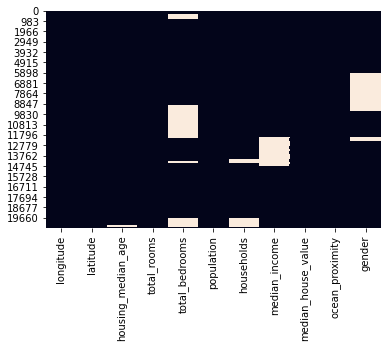

In [9]:
sns.heatmap(df.isnull(), cbar=False)
print("Total Missing: ", df.isna().sum().values.sum())

### Data Visualization Before:

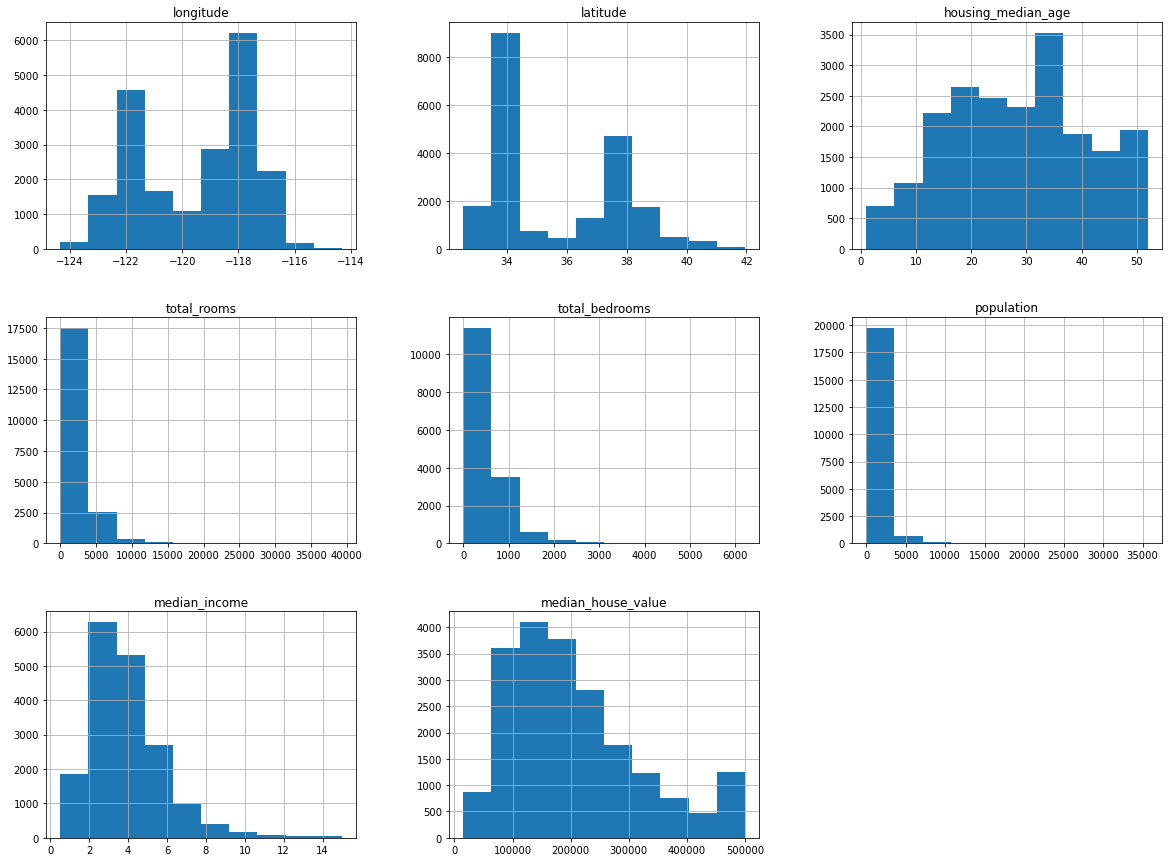

In [10]:
df.hist(figsize=(20,15))
plt.show()

#### Most houses have bedrooms between 0 to 1000.
#### Houses with more than 1000 room are rare.

Text(0.5, 0, 'Total bedrooms')

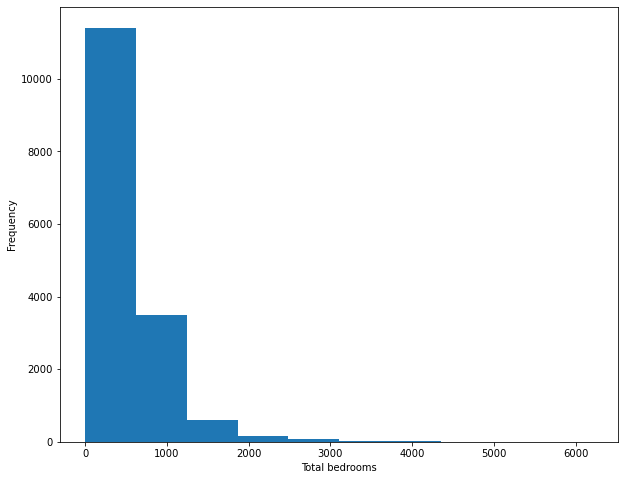

In [11]:
plt.figure(figsize=(10,8))
df['total_bedrooms'].plot(kind='hist')
plt.xlabel('Total bedrooms')

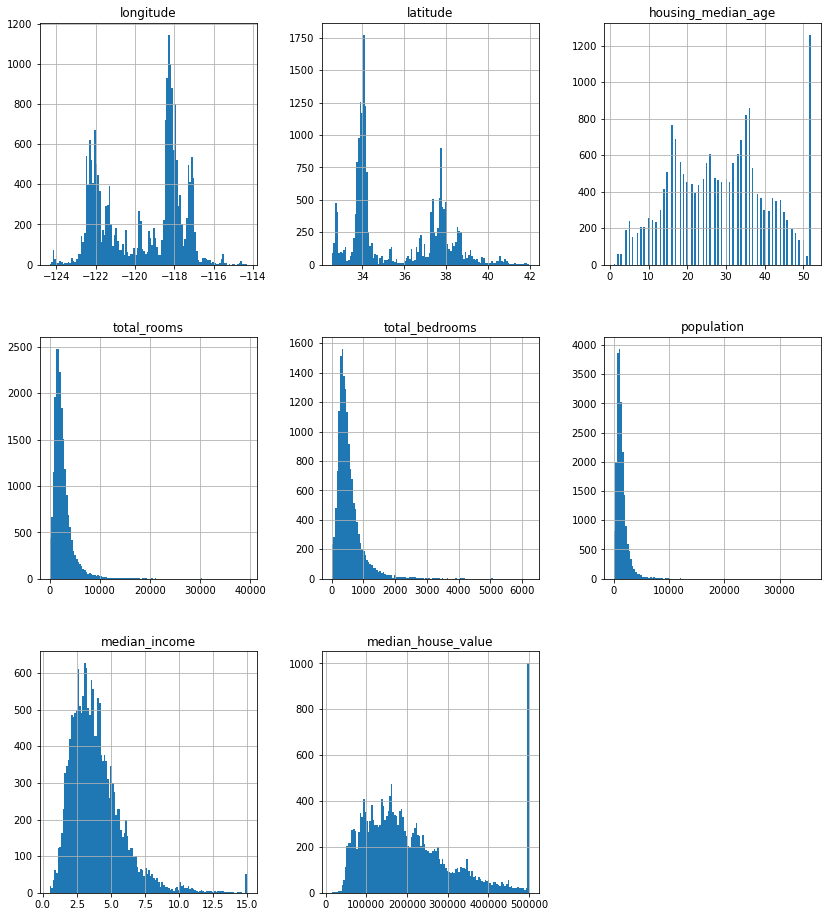

In [12]:
df.hist(bins=120, figsize = (14,16))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

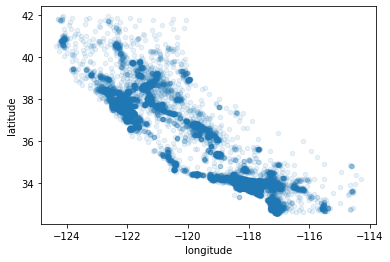

In [13]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

#### Outliers:

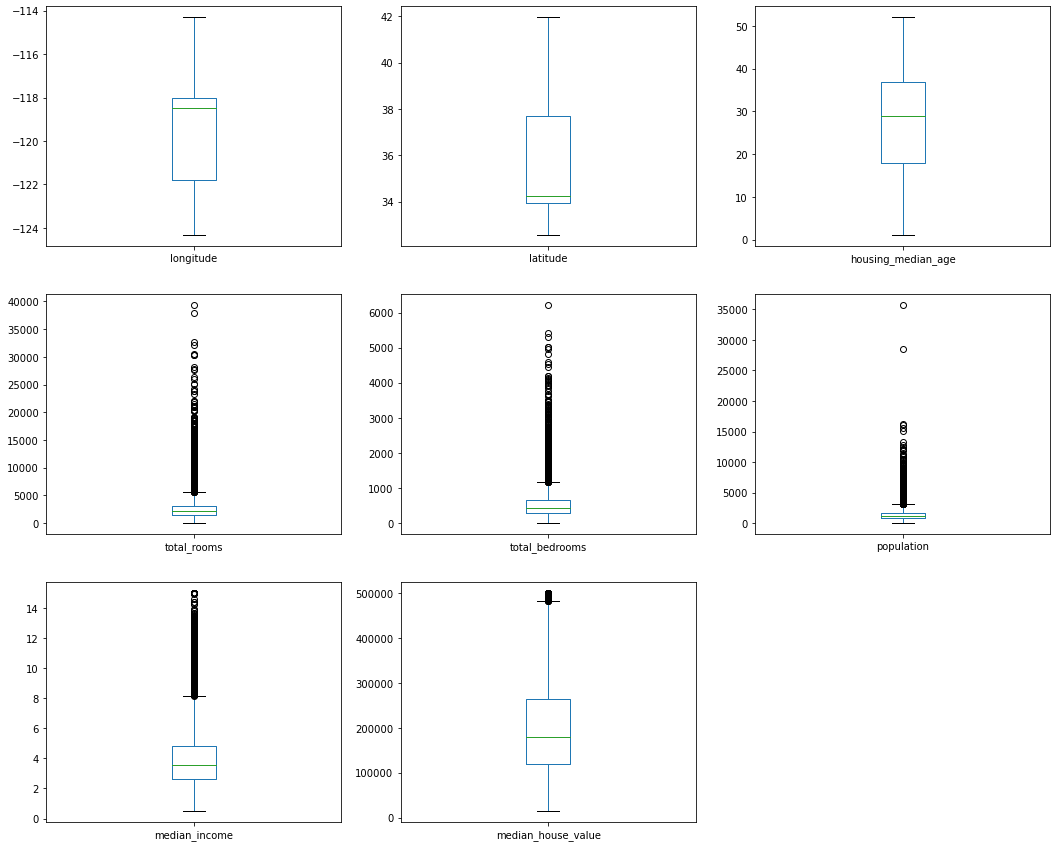

In [14]:
df.plot(kind='box', subplots = True, figsize=(18,15),layout=(3,3), sharex = False, sharey = False)
plt.show()

### Dropping unnecessary data:

In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

#### Dropping the gender column:

In [16]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY


#### Handelling the missing data:

In [17]:
df['total_bedrooms'].mode()

0    280.0
dtype: float64

In [65]:
df.loc[df['total_bedrooms'].isna(),'total_bedrooms']=df['total_bedrooms'].mean()

In [19]:
df.loc[df['median_income'].isna(),'median_income']=df['median_income'].mean()

In [20]:
df[(df['population']>4000)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
185,-122.23,37.79,43.0,5963,1344.000000,4367.0,1231,2.1917,112800,NEAR BAY
283,-122.16,37.79,22.0,12842,2048.000000,4985.0,1967,5.9849,371000,NEAR BAY
570,-122.24,37.72,5.0,18634,539.920104,7427.0,2718,7.6110,350700,NEAR BAY
576,-122.06,37.77,12.0,14316,539.920104,5781.0,2007,7.2634,341600,NEAR BAY
780,-122.10,37.63,18.0,9963,539.920104,5613.0,1946,3.8171,187200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20530,-121.76,38.57,NaN,15018,539.920104,7984.0,NaN,3.1371,201800,INLAND
20539,-121.71,38.56,NaN,8627,539.920104,4071.0,NaN,4.2198,164100,INLAND
20544,-121.76,38.55,NaN,8800,539.920104,6330.0,NaN,2.0650,219400,INLAND
20563,-121.75,38.67,NaN,12139,539.920104,6837.0,NaN,3.1250,132500,INLAND


In [29]:
df.loc[df['population'].isna(),'population']=df['population'].mean()

In [30]:

df.loc[df['housing_median_age'].isna(),'housing_median_age']=df['housing_median_age'].mean()

In [31]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY


In [40]:
df = df[df.isnull().sum(axis=1) < 3]

In [41]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.000000,880,129.0,322.000000,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.000000,7099,1106.0,2401.000000,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.000000,1467,190.0,496.000000,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.000000,1274,235.0,558.000000,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,28.676283,1627,280.0,1424.928724,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.000000,1665,374.0,845.000000,330,1.5603,78100,INLAND
20636,-121.21,39.49,18.000000,697,150.0,356.000000,114,2.5568,77100,INLAND
20637,-121.22,39.43,17.000000,2254,485.0,1007.000000,433,1.7000,92300,INLAND
20638,-121.32,39.43,18.000000,1860,409.0,741.000000,349,1.8672,84700,INLAND


In [42]:
df["households"]=df['households'].fillna(df["households"].mode()[0])

In [43]:
df.replace('no'    ,0,inplace=True)

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households', ylabel='Density'>

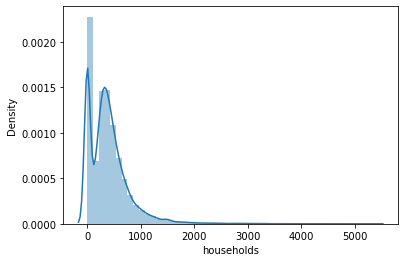

In [44]:
sns.distplot(df["households"])

In [45]:
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Total Missing:  0


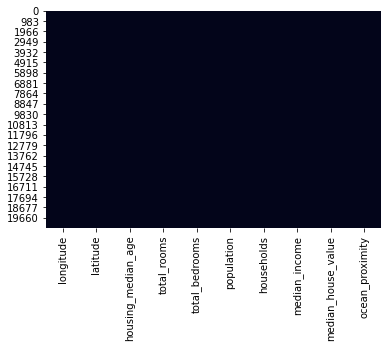

In [46]:
sns.heatmap(df.isnull(), cbar=False)
print("Total Missing: ", df.isna().sum().values.sum())

### Correlation:

- the median house value is positivily correlated with the median income and has a great impact
- while it is negatively correlated with the:
 - latitude: the value decreases when we go north
 - longitude: the value also decreases when we go west
 - population: the value decreases when the total number of people living in the block increases

In [49]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.650304
total_rooms           0.134153
housing_median_age    0.106648
total_bedrooms        0.044949
population           -0.024351
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

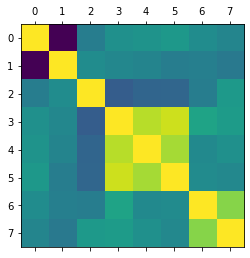

In [51]:
plt.matshow(df.corr())
plt.show()

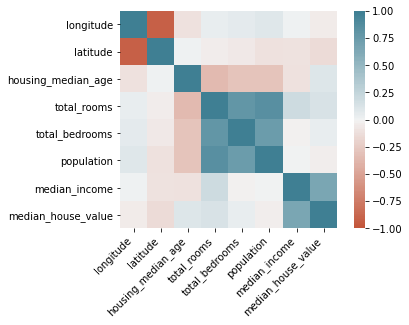

In [53]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Data Visualization after Handelling it:

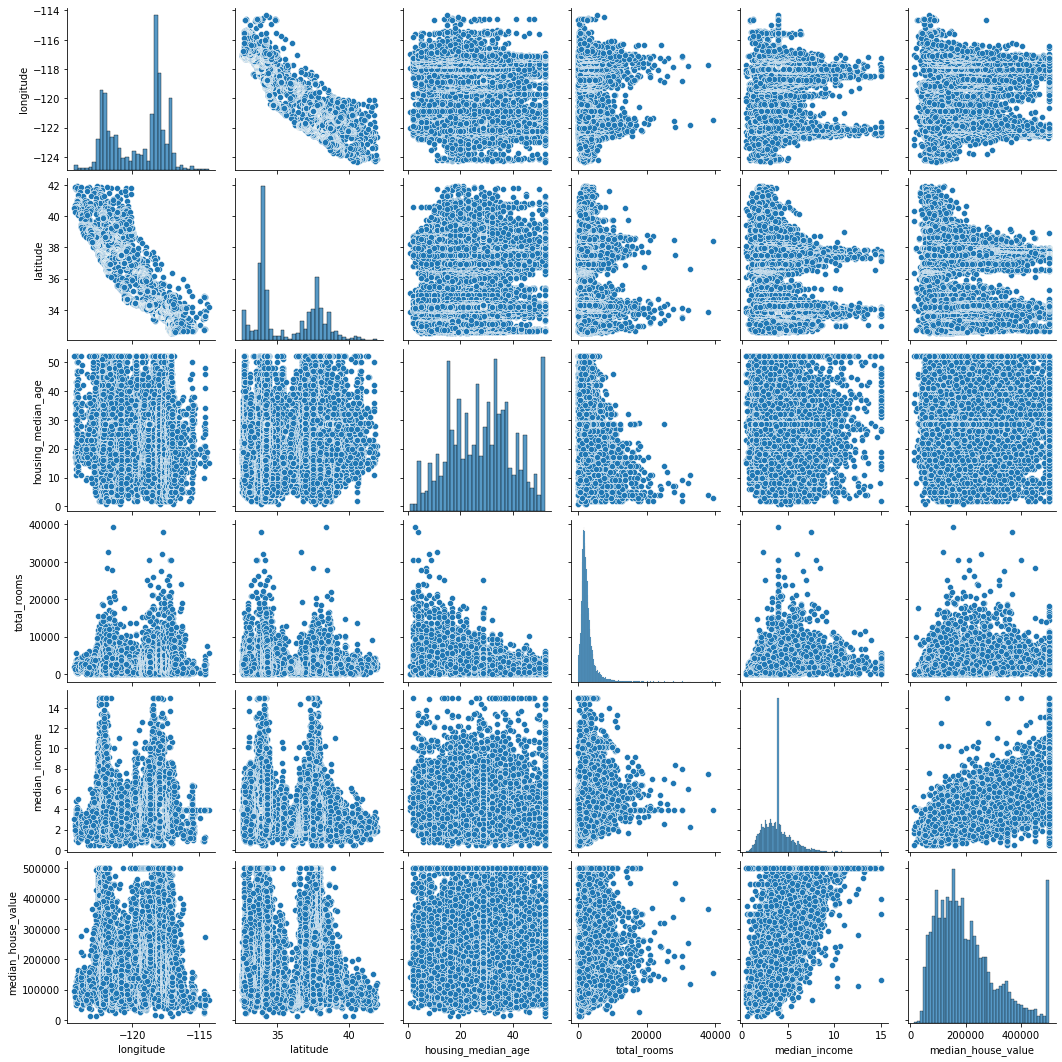

In [58]:
column_study = ["longitude", "latitude", "housing_median_age", "total_rooms", "median_income", "median_house_value", "households"]
sns.pairplot(df[column_study], height = 2.5);
plt.show()

In [113]:
import folium
from folium.plugins import HeatMap, MarkerCluster
from folium import Choropleth, Circle, Marker


cal_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(cal_map)
cal_map

#### shape of price distribution by the latitude and longitude:
- high-density areas are:
 * the Bay Area
 * around Los Angeles and San Diego
 * plus a long line of fairly high density in the Central Valley, around Sacramento and Fresno.

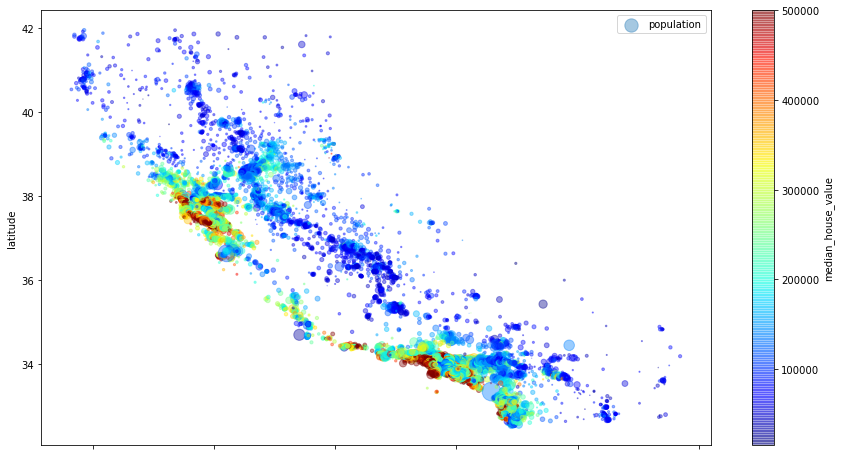

In [152]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population", figsize=(15,8),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [153]:
nearbay_df = df.loc[df['ocean_proximity'] == 'NEAR BAY']
nearbay_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.000000,880,129.0,322.000000,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.000000,7099,1106.0,2401.000000,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.000000,1467,190.0,496.000000,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.000000,1274,235.0,558.000000,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,28.676283,1627,280.0,1424.928724,259,3.8462,342200,NEAR BAY


In [108]:
latitude = 36.7783
longitude = -119.4179
island_df = df.loc[df['ocean_proximity'] == 'ISLAND']

m = folium.Map(location = [latitude, longitude], tiles='cartodbpositron', zoom_start=4)
for idx, row in island_df.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m)
m

#### Maximum Values around the 500001 Dollar and they are all near the ocean

In [132]:
print("House statistics:\n")
print(df['median_house_value'].describe())

House statistics:

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


### Linear Regression and Training:

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [134]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [135]:
Training = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [136]:
x = Training.drop(['median_house_value'],axis = 1).values
y = Training["median_house_value"].values

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 40)

In [138]:
x_train.shape

(15480, 8)

In [139]:
x_test.shape

(5160, 8)

In [140]:
y_train.shape

(15480,)

In [141]:
y_test.shape

(5160,)

In [142]:
100*x_test.shape[0]/x_train.shape[0]

33.333333333333336

In [143]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [145]:
y_predict = lr.predict(x_test)

In [146]:
lr.score(x_train, y_train)

0.5868339060852498

In [147]:
lr.score(x_test,y_test)

0.581149194438561

### Model Visualization:
Errors are close to normal distribution and also the mean is pretty close to zero

In [116]:
test_residuals = y_test - y_predict
test_residuals


array([ 11185.38093889, -61306.43844511,  13715.36551086, ...,
       -49592.36875296, -73804.00073398, -84994.9557901 ])

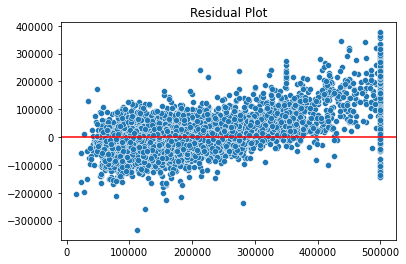

In [117]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');

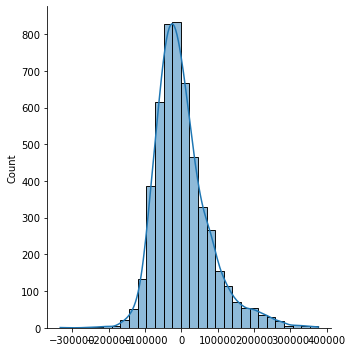

In [148]:
sns.displot(test_residuals,bins=30,kde=True);

In [149]:
predictions = lr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

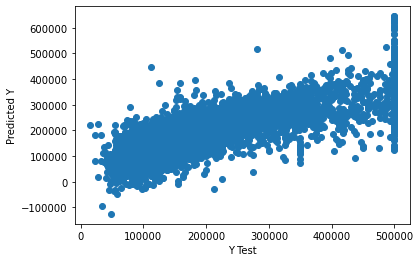

In [150]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')